# Income Classification 

Use the dataset and train a classification model to predict if the income of a person is lesss than 50K or greater then 50K

In [1]:
#Import the Libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [4]:
df.shape

(43957, 15)

In [5]:
#There are 43957 instances and 15 features out of which one is target feature

# 2) Feature Engineering 

Feature engineering steps: 
    
    1) Missing values 
    
    2) Outliers 
    
    3) Dummy Variables 
    
    4) Correlation 

### 1) Checking for the missing values 

In [6]:
df.isna().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [7]:
#three features have missing values 

Fill the missing values with mode in categorical features and with mean in numerical features 

In [8]:
df['workclass'].fillna(df['workclass'].mode, inplace=True)
df['occupation'].fillna(df['occupation'].mode, inplace=True)
df['native-country'].fillna(df['native-country'].mode, inplace=True)

In [9]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [10]:
# All the null values are replaced with mode values of the respective column 

### 2) Dropping the redundant features 

In [11]:
df.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0


Here by observation we can see that education and educational-num give the same information. Hence we can drop one of the feature. We prefer to keep the numerial features so we will drop the education column 

In [12]:
df.drop('native-country', axis=1, inplace=True)

In [13]:
df.shape

(43957, 14)

### 3) Checking for outliers 

To check for outliers we can make the boxplot. It will give us an idea. For simplicity in this program we will deal with outliers in age column only 

<AxesSubplot:xlabel='age'>

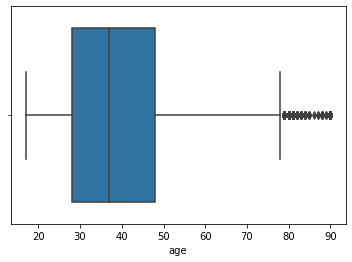

In [14]:
sns.boxplot(data=df, x='age')

### Write a function to find the outliers 

In [15]:
def ret_outliers (df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    
    iqr= (q3-q1)
    
    lower = q1-1.5*iqr
    upper= q3+1.5*iqr
    
    outliers=[]
    
    for i in df:
        if i<lower or i>upper:
            outliers.append(i)
            
            
    return outliers 
        

In [16]:
olr=ret_outliers(df['age'])

In [17]:
len(olr)

193

In [18]:
max(olr)

90

In [19]:
min(olr)

79

We see that the feature age has 193 outliers with max value of 90 anf min value of 79

For working class people generally the age is between 18 to 65

In this program we will remove the upper limit outliers i.e age >79

In [20]:
df.drop(df[df['age']>79].index, inplace=True)

In [21]:
df.shape

(43791, 14)

### 4) Checking for Correlation 

In [22]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
age,1.000000,-0.074975,0.039525,0.076638,0.056582,0.085505,0.239014
fnlwgt,-0.074975,1.000000,-0.041381,-0.003273,-0.005875,-0.013147,-0.006995
educational-num,0.039525,-0.041381,1.000000,0.126554,0.081100,0.144100,0.334028
capital-gain,0.076638,-0.003273,0.126554,1.000000,-0.031451,0.082449,0.222809
capital-loss,0.056582,-0.005875,0.081100,-0.031451,1.000000,0.055521,0.145384
hours-per-week,0.085505,-0.013147,0.144100,0.082449,0.055521,1.000000,0.227622
income_>50K,0.239014,-0.006995,0.334028,0.222809,0.145384,0.227622,1.000000


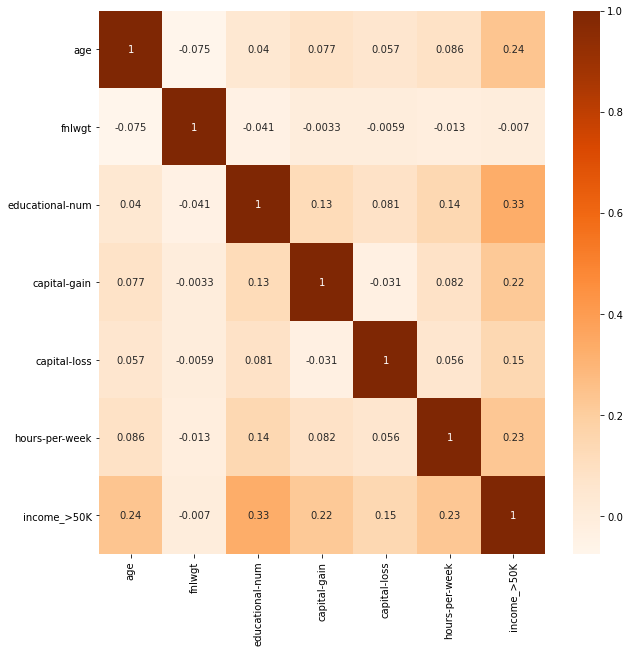

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, cmap= 'Oranges')
plt.show()

In [24]:
# Dropping the fnlwgt colummn

df.drop('fnlwgt', axis=1, inplace=True )

In [25]:
df.head(2)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income_>50K
0,67,Private,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,1
1,17,Private,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,0


In [26]:
df.shape

(43791, 13)

### 5) Dealing with the categorical values 

In [27]:
#Getting the list of categorical type features 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43791 entries, 0 to 43956
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43791 non-null  int64 
 1   workclass        43791 non-null  object
 2   education        43791 non-null  object
 3   educational-num  43791 non-null  int64 
 4   marital-status   43791 non-null  object
 5   occupation       43791 non-null  object
 6   relationship     43791 non-null  object
 7   race             43791 non-null  object
 8   gender           43791 non-null  object
 9   capital-gain     43791 non-null  int64 
 10  capital-loss     43791 non-null  int64 
 11  hours-per-week   43791 non-null  int64 
 12  income_>50K      43791 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 4.7+ MB


In [29]:
categorical_values= list(df.select_dtypes(include='object').columns)

In [30]:
categorical_values

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender']

In [31]:
df=pd.get_dummies(data=df, columns=categorical_values, drop_first=True)

In [32]:
df.shape

(43791, 59)

In [33]:
df.head(2)

,age,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
0,67,16,99999,0,60,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,1
1,17,8,0,0,15,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1


#Note: The error I was facing was because the dataframe had changed when I had executed the line earlier 

# 3) Train Test split 

In [34]:
X=df.drop('income_>50K', axis=1)
y=df['income_>50K']

In [35]:
X.shape

(43791, 58)

In [36]:
y.shape

(43791,)

In [37]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.25, random_state=52)

# 4) Standardization 

In [39]:
from sklearn.preprocessing import StandardScaler
SC= StandardScaler()

X_train=SC.fit_transform(X_train)
X_test=SC.transform(X_test)

In [40]:
type(X_train)

numpy.ndarray

In [41]:
#We do not do scaling on the target variable

# 5) Training different models and comparing their performances 

We will use follwing different algorithms :
    
    1) KNN Classifier
    
    2) Random Forest Classifier
    
    3) Decision Tree 
    
    4) Logistic Regression 
    
    5) XGBoost 

We will search for the best parameters for the above algorithms using randomizedsearchcv 

In [42]:
#Importing the library for Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

#Importing library for metrics for model evaluation 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Make a dataframe to store the accuracy data of all the models for easy comparision 
result=pd.DataFrame(columns=['Model','Accuracy Score'])

### 1) KNN Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf= KNeighborsClassifier()

#Hyperparameters

n_neighbors= list(range(1,20))
metric=['minkowski']
p=[1,2]
algorithm=['auto']
weights=['uniform', 'distane']
leaf_size=list(range(1,20))


#Putting the hypreparameters in form of dictionary 

knn_hyperparameters= dict(n_neighbors= n_neighbors, 
                          metric=metric, 
                         weights=weights,
                         algorithm=algorithm, 
                         p=p, 
                         leaf_size= leaf_size)


knn_gridsearch= RandomizedSearchCV(estimator=knn_clf,
                                  param_distributions=knn_hyperparameters, 
                                  cv=3, verbose=10)


knn_gridsearch.fit(X_train, y_train)


knn_gridsearch.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START algorithm=auto, leaf_size=14, metric=minkowski, n_neighbors=14, p=2, weights=distane


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 1/3; 1/10] END algorithm=auto, leaf_size=14, metric=minkowski, n_neighbors=14, p=2, weights=distane; total time=   8.1s
[CV 2/3; 1/10] START algorithm=auto, leaf_size=14, metric=minkowski, n_neighbors=14, p=2, weights=distane


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 2/3; 1/10] END algorithm=auto, leaf_size=14, metric=minkowski, n_neighbors=14, p=2, weights=distane; total time=   4.9s
[CV 3/3; 1/10] START algorithm=auto, leaf_size=14, metric=minkowski, n_neighbors=14, p=2, weights=distane


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 3/3; 1/10] END algorithm=auto, leaf_size=14, metric=minkowski, n_neighbors=14, p=2, weights=distane; total time=   4.8s
[CV 1/3; 2/10] START algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=13, p=2, weights=uniform
[CV 1/3; 2/10] END algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=13, p=2, weights=uniform; total time=   5.2s
[CV 2/3; 2/10] START algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=13, p=2, weights=uniform
[CV 2/3; 2/10] END algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=13, p=2, weights=uniform; total time=   4.9s
[CV 3/3; 2/10] START algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=13, p=2, weights=uniform
[CV 3/3; 2/10] END algorithm=auto, leaf_size=5, metric=minkowski, n_neighbors=13, p=2, weights=uniform; total time=   4.6s
[CV 1/3; 3/10] START algorithm=auto, leaf_size=8, metric=minkowski, n_neighbors=17, p=2, weights=distane


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 1/3; 3/10] END algorithm=auto, leaf_size=8, metric=minkowski, n_neighbors=17, p=2, weights=distane; total time=   4.9s
[CV 2/3; 3/10] START algorithm=auto, leaf_size=8, metric=minkowski, n_neighbors=17, p=2, weights=distane


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 2/3; 3/10] END algorithm=auto, leaf_size=8, metric=minkowski, n_neighbors=17, p=2, weights=distane; total time=   5.0s
[CV 3/3; 3/10] START algorithm=auto, leaf_size=8, metric=minkowski, n_neighbors=17, p=2, weights=distane


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 3/3; 3/10] END algorithm=auto, leaf_size=8, metric=minkowski, n_neighbors=17, p=2, weights=distane; total time=   4.7s
[CV 1/3; 4/10] START algorithm=auto, leaf_size=13, metric=minkowski, n_neighbors=8, p=1, weights=distane


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 1/3; 4/10] END algorithm=auto, leaf_size=13, metric=minkowski, n_neighbors=8, p=1, weights=distane; total time=  15.4s
[CV 2/3; 4/10] START algorithm=auto, leaf_size=13, metric=minkowski, n_neighbors=8, p=1, weights=distane


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 2/3; 4/10] END algorithm=auto, leaf_size=13, metric=minkowski, n_neighbors=8, p=1, weights=distane; total time=  15.1s
[CV 3/3; 4/10] START algorithm=auto, leaf_size=13, metric=minkowski, n_neighbors=8, p=1, weights=distane


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 3/3; 4/10] END algorithm=auto, leaf_size=13, metric=minkowski, n_neighbors=8, p=1, weights=distane; total time=  15.1s
[CV 1/3; 5/10] START algorithm=auto, leaf_size=7, metric=minkowski, n_neighbors=1, p=1, weights=distane


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 1/3; 5/10] END algorithm=auto, leaf_size=7, metric=minkowski, n_neighbors=1, p=1, weights=distane; total time=  13.1s
[CV 2/3; 5/10] START algorithm=auto, leaf_size=7, metric=minkowski, n_neighbors=1, p=1, weights=distane


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 2/3; 5/10] END algorithm=auto, leaf_size=7, metric=minkowski, n_neighbors=1, p=1, weights=distane; total time=  13.3s
[CV 3/3; 5/10] START algorithm=auto, leaf_size=7, metric=minkowski, n_neighbors=1, p=1, weights=distane


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 3/3; 5/10] END algorithm=auto, leaf_size=7, metric=minkowski, n_neighbors=1, p=1, weights=distane; total time=  13.0s
[CV 1/3; 6/10] START algorithm=auto, leaf_size=12, metric=minkowski, n_neighbors=17, p=2, weights=uniform
[CV 1/3; 6/10] END algorithm=auto, leaf_size=12, metric=minkowski, n_neighbors=17, p=2, weights=uniform; total time=   4.8s
[CV 2/3; 6/10] START algorithm=auto, leaf_size=12, metric=minkowski, n_neighbors=17, p=2, weights=uniform
[CV 2/3; 6/10] END algorithm=auto, leaf_size=12, metric=minkowski, n_neighbors=17, p=2, weights=uniform; total time=   4.6s
[CV 3/3; 6/10] START algorithm=auto, leaf_size=12, metric=minkowski, n_neighbors=17, p=2, weights=uniform
[CV 3/3; 6/10] END algorithm=auto, leaf_size=12, metric=minkowski, n_neighbors=17, p=2, weights=uniform; total time=   4.8s
[CV 1/3; 7/10] START algorithm=auto, leaf_size=12, metric=minkowski, n_neighbors=11, p=1, weights=uniform
[CV 1/3; 7/10] END algorithm=auto, leaf_size=12, metric=minkowski, n_neighbors=11,

C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 1/3; 8/10] END algorithm=auto, leaf_size=12, metric=minkowski, n_neighbors=1, p=2, weights=distane; total time=   2.5s
[CV 2/3; 8/10] START algorithm=auto, leaf_size=12, metric=minkowski, n_neighbors=1, p=2, weights=distane


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 2/3; 8/10] END algorithm=auto, leaf_size=12, metric=minkowski, n_neighbors=1, p=2, weights=distane; total time=   2.7s
[CV 3/3; 8/10] START algorithm=auto, leaf_size=12, metric=minkowski, n_neighbors=1, p=2, weights=distane


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 3/3; 8/10] END algorithm=auto, leaf_size=12, metric=minkowski, n_neighbors=1, p=2, weights=distane; total time=   2.7s
[CV 1/3; 9/10] START algorithm=auto, leaf_size=11, metric=minkowski, n_neighbors=15, p=1, weights=distane


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 1/3; 9/10] END algorithm=auto, leaf_size=11, metric=minkowski, n_neighbors=15, p=1, weights=distane; total time=  15.6s
[CV 2/3; 9/10] START algorithm=auto, leaf_size=11, metric=minkowski, n_neighbors=15, p=1, weights=distane


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 2/3; 9/10] END algorithm=auto, leaf_size=11, metric=minkowski, n_neighbors=15, p=1, weights=distane; total time=  15.3s
[CV 3/3; 9/10] START algorithm=auto, leaf_size=11, metric=minkowski, n_neighbors=15, p=1, weights=distane


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 3/3; 9/10] END algorithm=auto, leaf_size=11, metric=minkowski, n_neighbors=15, p=1, weights=distane; total time=  15.0s
[CV 1/3; 10/10] START algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=14, p=2, weights=distane


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 1/3; 10/10] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=14, p=2, weights=distane; total time=   4.7s
[CV 2/3; 10/10] START algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=14, p=2, weights=distane


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

[CV 2/3; 10/10] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=14, p=2, weights=distane; total time=   4.6s
[CV 3/3; 10/10] START algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=14, p=2, weights=distane
[CV 3/3; 10/10] END algorithm=auto, leaf_size=10, metric=minkowski, n_neighbors=14, p=2, weights=distane; total time=   4.7s


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 11,
 'metric': 'minkowski',
 'leaf_size': 12,
 'algorithm': 'auto'}

In [44]:
# Model will take some time to train. While it is at it we will make setup to evaluate the model

#Predict the test tesults

knn_y_predict= knn_gridsearch.predict(X_test)


#Model Evaluation ; Confusion Matrix, Classification report, accuracy_score 


print ('\n Confuision Matrix: \n', confusion_matrix(y_test,knn_y_predict ))
print ('\n Classification Report: \n', classification_report(y_test,knn_y_predict ))
knn_accuracy= accuracy_score(y_test,knn_y_predict)

#Append the value of accuracy in the dataframe that we created earlier 

result.loc[0]= ['KNN classifier', knn_accuracy]


# Our model is still training... We wil wait for it to complete. 
#The above code will be reused by us in other modelels by using copy paste and modifying some values 


 Confuision Matrix: 
 [[6203 2163]
 [ 944 1638]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.74      0.80      8366
           1       0.43      0.63      0.51      2582

    accuracy                           0.72     10948
   macro avg       0.65      0.69      0.66     10948
weighted avg       0.76      0.72      0.73     10948



# 2) Decision Tree 

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier()

#Hyperparameters

criterion=['gini', 'entropy']
splitter=['best', 'random']

min_samples_leaf=[1,2,4]
min_samples_split=[2,5,10]

max_depth= list(range(10,100, 10))
max_features=['auto', 'sqrt', 'log2', None]

#Putting hyperparameters in form of dictionary 

dt_hyperparameters= dict(criterion=criterion,
                         splitter=splitter, 
                         min_samples_leaf=min_samples_leaf,
                         min_samples_split=min_samples_split,
                         max_depth=max_depth,
                         max_features=max_features)
                         
    
dt_gridsearch= RandomizedSearchCV(estimator= dt_clf, 
                                  param_distributions=dt_hyperparameters, 
                                 cv=3, verbose=10)

#Fit the train in GRidSearch 

dt_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best
[CV 1/3; 1/10] END criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV 2/3; 1/10] START criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best
[CV 2/3; 1/10] END criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV 3/3; 1/10] START criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best
[CV 3/3; 1/10] END criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   0.0s
[CV 1/3; 2/10] START criterion=gini, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitt

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   verbose=10)

In [50]:
dt_gridsearch.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

In [53]:
# Evaluation of the model 

#Predict the test tesults

dt_y_predict= dt_gridsearch.predict(X_test)


#Model Evaluation ; Confusion Matrix, Classification report, accuracy_score 


print ('\n Confuision Matrix: \n', confusion_matrix(y_test,dt_y_predict ))
print ('\n Classification Report: \n', classification_report(y_test,dt_y_predict ))
dt_accuracy= accuracy_score(y_test, dt_y_predict)

#Append the value of accuracy in the dataframe that we created earlier 

result.loc[1]= ['Decision Tree classifier', dt_accuracy]




 Confuision Matrix: 
 [[6372 1994]
 [ 653 1929]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.76      0.83      8366
           1       0.49      0.75      0.59      2582

    accuracy                           0.76     10948
   macro avg       0.70      0.75      0.71     10948
weighted avg       0.81      0.76      0.77     10948



In [54]:
result

,Model,Accuracy Score
0,KNN classifier,0.716204
1,Decision Tree classifier,0.758221


# 3) Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf_clf= RandomForestClassifier()

#Hyperparameters 

criterion=['gini', 'entropy']
max_depth=list(range(10,100,10))
min_samples_leaf=[1,2,4]
min_samples_split=[2,5,10]

max_features =['auto', 'sqrt']
bootstrap=[True, False]



#Putting the hyperparameters in a dictionary 

rf_hyperparameters= dict(criterion=criterion,
                        max_depth=max_depth,
                        min_samples_leaf=min_samples_leaf,
                        min_samples_split=min_samples_split,
                        max_features=max_features,
                        bootstrap= bootstrap)

rf_gridsearch= RandomizedSearchCV(estimator= rf_clf,
                                 param_distributions= rf_hyperparameters, 
                                 cv=3, verbose=10)


#Fit the gridsearch of train data 

rf_gridsearch.fit(X_train, y_train)

rf_gridsearch.best_params_
       

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2
[CV 1/3; 1/10] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   2.1s
[CV 2/3; 1/10] START bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2
[CV 2/3; 1/10] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   1.9s
[CV 3/3; 1/10] START bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2
[CV 3/3; 1/10] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   1.9s
[CV 1/3; 2/10] START bootstrap=False, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_spli

{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 50,
 'criterion': 'gini',
 'bootstrap': False}

In [57]:
# Evaluation of the model 

#Predict the test tesults

rf_y_predict= rf_gridsearch.predict(X_test)


#Model Evaluation ; Confusion Matrix, Classification report, accuracy_score 


print ('\n Confuision Matrix: \n', confusion_matrix(y_test,rf_y_predict ))
print ('\n Classification Report: \n', classification_report(y_test,rf_y_predict ))
rf_accuracy= accuracy_score(y_test, rf_y_predict)

#Append the value of accuracy in the dataframe that we created earlier 

result.loc[2]= ['RandomForest classifier', rf_accuracy]



 Confuision Matrix: 
 [[6281 2085]
 [ 590 1992]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.75      0.82      8366
           1       0.49      0.77      0.60      2582

    accuracy                           0.76     10948
   macro avg       0.70      0.76      0.71     10948
weighted avg       0.81      0.76      0.77     10948



In [59]:
result

,Model,Accuracy Score
0,KNN classifier,0.716204
1,Decision Tree classifier,0.758221
2,RandomForest classifier,0.755663


# 4) Logistic Regression 

In [60]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()


#Hyperparameters for Logistic Regression 

penalty=['l1', 'l2', 'elasticnet', None]
C=np.logspace(-4,4,50)
solver= ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
max_iter= [100,500,1000,2000,5000]


lr_hyperparameters= dict(penalty=penalty,
                        C=C,
                        solver=solver,
                        max_iter=max_iter)


lr_gridsearch= RandomizedSearchCV(estimator = lr,
                                 param_distributions= lr_hyperparameters, 
                                 cv=3, verbose=10)

lr_gridsearch.fit(X_train,y_train)

lr_gridsearch.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START C=0.2682695795279725, max_iter=2000, penalty=elasticnet, solver=liblinear
[CV 1/3; 1/10] END C=0.2682695795279725, max_iter=2000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 2/3; 1/10] START C=0.2682695795279725, max_iter=2000, penalty=elasticnet, solver=liblinear
[CV 2/3; 1/10] END C=0.2682695795279725, max_iter=2000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 3/3; 1/10] START C=0.2682695795279725, max_iter=2000, penalty=elasticnet, solver=liblinear
[CV 3/3; 1/10] END C=0.2682695795279725, max_iter=2000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 1/3; 2/10] START C=2.559547922699533, max_iter=1000, penalty=elasticnet, solver=newton-cg
[CV 1/3; 2/10] END C=2.559547922699533, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 2/3; 2/10] START C=2.559547922699533, max_iter=1000, penalty=elasticnet, solver=newton-cg
[CV 2/3; 2/10] 

C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_val

[CV 1/3; 3/10] END C=0.18420699693267145, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.4s
[CV 2/3; 3/10] START C=0.18420699693267145, max_iter=2000, penalty=l2, solver=liblinear
[CV 2/3; 3/10] END C=0.18420699693267145, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.4s
[CV 3/3; 3/10] START C=0.18420699693267145, max_iter=2000, penalty=l2, solver=liblinear
[CV 3/3; 3/10] END C=0.18420699693267145, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.4s
[CV 1/3; 4/10] START C=232.99518105153672, max_iter=2000, penalty=None, solver=saga
[CV 1/3; 4/10] END C=232.99518105153672, max_iter=2000, penalty=None, solver=saga; total time=   0.0s
[CV 2/3; 4/10] START C=232.99518105153672, max_iter=2000, penalty=None, solver=saga
[CV 2/3; 4/10] END C=232.99518105153672, max_iter=2000, penalty=None, solver=saga; total time=   0.0s
[CV 3/3; 4/10] START C=232.99518105153672, max_iter=2000, penalty=None, solver=saga
[CV 3/3; 4/10] END C=232.99518105153672, max_iter=

C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 439, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\artem\anaconda3\lib\site-packages\sk

[CV 2/3; 5/10] END C=0.05963623316594643, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/3; 5/10] START C=0.05963623316594643, max_iter=5000, penalty=l2, solver=lbfgs
[CV 3/3; 5/10] END C=0.05963623316594643, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/3; 6/10] START C=719.6856730011514, max_iter=5000, penalty=l1, solver=newton-cg
[CV 1/3; 6/10] END C=719.6856730011514, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/3; 6/10] START C=719.6856730011514, max_iter=5000, penalty=l1, solver=newton-cg
[CV 2/3; 6/10] END C=719.6856730011514, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/3; 6/10] START C=719.6856730011514, max_iter=5000, penalty=l1, solver=newton-cg
[CV 3/3; 6/10] END C=719.6856730011514, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/3; 7/10] START C=2222.996482526191, max_iter=100, penalty=l2, solver=liblinear


C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selectio

[CV 1/3; 7/10] END C=2222.996482526191, max_iter=100, penalty=l2, solver=liblinear; total time=   0.5s
[CV 2/3; 7/10] START C=2222.996482526191, max_iter=100, penalty=l2, solver=liblinear
[CV 2/3; 7/10] END C=2222.996482526191, max_iter=100, penalty=l2, solver=liblinear; total time=   0.4s
[CV 3/3; 7/10] START C=2222.996482526191, max_iter=100, penalty=l2, solver=liblinear
[CV 3/3; 7/10] END C=2222.996482526191, max_iter=100, penalty=l2, solver=liblinear; total time=   0.4s
[CV 1/3; 8/10] START C=339.3221771895323, max_iter=5000, penalty=elasticnet, solver=saga
[CV 1/3; 8/10] END C=339.3221771895323, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 2/3; 8/10] START C=339.3221771895323, max_iter=5000, penalty=elasticnet, solver=saga
[CV 2/3; 8/10] END C=339.3221771895323, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 3/3; 8/10] START C=339.3221771895323, max_iter=5000, penalty=elasticnet, solver=saga
[CV 3/3; 8/10] END C=339.3221771895323, 

C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\artem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\artem\anaco

[CV 1/3; 9/10] END C=0.8286427728546842, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.4s
[CV 2/3; 9/10] START C=0.8286427728546842, max_iter=5000, penalty=l2, solver=liblinear
[CV 2/3; 9/10] END C=0.8286427728546842, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.6s
[CV 3/3; 9/10] START C=0.8286427728546842, max_iter=5000, penalty=l2, solver=liblinear
[CV 3/3; 9/10] END C=0.8286427728546842, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.5s
[CV 1/3; 10/10] START C=0.013257113655901081, max_iter=2000, penalty=l2, solver=lbfgs
[CV 1/3; 10/10] END C=0.013257113655901081, max_iter=2000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/3; 10/10] START C=0.013257113655901081, max_iter=2000, penalty=l2, solver=lbfgs
[CV 2/3; 10/10] END C=0.013257113655901081, max_iter=2000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/3; 10/10] START C=0.013257113655901081, max_iter=2000, penalty=l2, solver=lbfgs
[CV 3/3; 10/10] END C=0.013257113655901081, m

C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.85098815        nan 0.85098815        nan
 0.8508968         nan 0.850775   0.85074455]
  warnings.warn(


{'solver': 'liblinear',
 'penalty': 'l2',
 'max_iter': 2000,
 'C': 0.18420699693267145}

In [70]:

#Predict the test tesults

lr_y_predict= lr_gridsearch.predict(X_test)


#Model Evaluation ; Confusion Matrix, Classification report, accuracy_score 


print ('\n Confuision Matrix: \n', confusion_matrix(y_test,lr_y_predict ))
print ('\n Classification Report: \n', classification_report(y_test,lr_y_predict ))
lr_accuracy= accuracy_score(y_test, lr_y_predict)

#Append the value of accuracy in the dataframe that we created earlier 

result.loc[3]= ['Logistic Regression', lr_accuracy]



 Confuision Matrix: 
 [[   0 8366]
 [   0 2582]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      8366
           1       0.24      1.00      0.38      2582

    accuracy                           0.24     10948
   macro avg       0.12      0.50      0.19     10948
weighted avg       0.06      0.24      0.09     10948



C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\artem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
result

,Model,Accuracy Score
0,KNN classifier,0.716204
1,Decision Tree classifier,0.758221
2,RandomForest classifier,0.755663
3,Logistic Regression,0.235842


## 5) XGBoost Classifier

In [66]:
from xgboost import XGBClassifier
xgb_clf= XGBClassifier()


#hyperparameters 

max_depth = [3,6,9,12,15]
learning_rate= [float(x) for x in np.linspace(0.01, 0.9, 25)]
n_estimators = list(range(100,1000,100))

reg_alpha= [0,0.1,0.2,0.4,0.8, 1.6,3.2,6.4,12.8,25.6,51.2,102.4,204.8]
reg_lambda= [0,0.1,0.2,0.4,0.8, 1.6,3.2,6.4,12.8,25.6,51.2,102.4,204.8]
gamma= [0,0.1,0.2,0.4,0.8, 1.6,3.2,6.4,12.8,25.6,51.2,102.4,204.8]

booster=['gbtree', 'gblinear']

# Puttin the hyperparameters in a dictionary 

xgb_hyperparameters= dict(max_depth=max_depth,
                          learning_rate=learning_rate,
                          n_estimators=n_estimators,
                          reg_alpha=reg_alpha,
                          reg_lambda=reg_lambda,
                          gamma=gamma,
                          booster=booster
                         )


xgb_gridsearch= RandomizedSearchCV(xgb_clf, 
                                  param_distributions= xgb_hyperparameters,
                                  cv=3, verbose=10)

xgb_gridsearch.fit(X_train, y_train)


xgb_gridsearch.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START booster=gblinear, gamma=51.2, learning_rate=0.6033333333333334, max_depth=6, n_estimators=900, reg_alpha=12.8, reg_lambda=0.2
[19:30:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/3; 1/10] END booster=gblinear, gamma=51.2, learning_rate=0.6033333333333334, max_depth=6, n_estimators=900, reg_alpha=12.8, reg_lambda=0.2; total time=   1.8s
[CV 2/3; 1/10] START booster=gblinear, gamma=51.2, learning_rate=0.6033333333333334, max_depth=6, n_estimators=900, reg_alpha=12.8, reg_lambda=0.2
[19:30:05] WARNING: C:/Users/Administrator/workspace/

[CV 3/3; 4/10] END booster=gblinear, gamma=0.4, learning_rate=0.7516666666666667, max_depth=6, n_estimators=400, reg_alpha=0.4, reg_lambda=102.4; total time=   0.8s
[CV 1/3; 5/10] START booster=gbtree, gamma=0.8, learning_rate=0.01, max_depth=9, n_estimators=900, reg_alpha=0.4, reg_lambda=12.8
[CV 1/3; 5/10] END booster=gbtree, gamma=0.8, learning_rate=0.01, max_depth=9, n_estimators=900, reg_alpha=0.4, reg_lambda=12.8; total time=  17.2s
[CV 2/3; 5/10] START booster=gbtree, gamma=0.8, learning_rate=0.01, max_depth=9, n_estimators=900, reg_alpha=0.4, reg_lambda=12.8
[CV 2/3; 5/10] END booster=gbtree, gamma=0.8, learning_rate=0.01, max_depth=9, n_estimators=900, reg_alpha=0.4, reg_lambda=12.8; total time=  17.8s
[CV 3/3; 5/10] START booster=gbtree, gamma=0.8, learning_rate=0.01, max_depth=9, n_estimators=900, reg_alpha=0.4, reg_lambda=12.8
[CV 3/3; 5/10] END booster=gbtree, gamma=0.8, learning_rate=0.01, max_depth=9, n_estimators=900, reg_alpha=0.4, reg_lambda=12.8; total time=  17.4s
[

[CV 2/3; 9/10] END booster=gblinear, gamma=0.4, learning_rate=0.08416666666666667, max_depth=15, n_estimators=400, reg_alpha=3.2, reg_lambda=0.2; total time=   0.9s
[CV 3/3; 9/10] START booster=gblinear, gamma=0.4, learning_rate=0.08416666666666667, max_depth=15, n_estimators=400, reg_alpha=3.2, reg_lambda=0.2
[19:31:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/3; 9/10] END booster=gblinear, gamma=0.4, learning_rate=0.08416666666666667, max_depth=15, n_estimators=400, reg_alpha=3.2, reg_lambda=0.2; total time=   0.9s
[CV 1/3; 10/10] START booster=gblinear, gamma=0, learning_rate=0.6775000000000001, max_depth=9, 

{'reg_lambda': 12.8,
 'reg_alpha': 0.4,
 'n_estimators': 900,
 'max_depth': 9,
 'learning_rate': 0.01,
 'gamma': 0.8,
 'booster': 'gbtree'}

In [68]:

#Predict the test tesults

xgb_y_predict= xgb_gridsearch.predict(X_test)


#Model Evaluation ; Confusion Matrix, Classification report, accuracy_score 


print ('\n Confuision Matrix: \n', confusion_matrix(y_test,xgb_y_predict ))
print ('\n Classification Report: \n', classification_report(y_test,xgb_y_predict ))
xgb_accuracy= accuracy_score(y_test, xgb_y_predict)

#Append the value of accuracy in the dataframe that we created earlier 

result.loc[4]= ['XGBoost Classifier', xgb_accuracy]



 Confuision Matrix: 
 [[8044  322]
 [2016  566]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      8366
           1       0.64      0.22      0.33      2582

    accuracy                           0.79     10948
   macro avg       0.72      0.59      0.60     10948
weighted avg       0.76      0.79      0.74     10948



In [71]:
result

,Model,Accuracy Score
0,KNN classifier,0.716204
1,Decision Tree classifier,0.758221
2,RandomForest classifier,0.755663
3,Logistic Regression,0.235842
4,XGBoost Classifier,0.786445


# Final Observation : XGBoost gives the highest accuracy 